In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from classy import Class
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from matplotlib import ticker, cm

In [10]:
Avals = np.logspace(-8,-3,100)
Mvals = np.logspace(1,4,50)


models = set()
moddata = {}
cosmo = Class()

Ndone = 0
Ntodo = Avals.size*Mvals.size

for M in Mvals:
    for A in Avals:
        model = 'M=' + str(M) + '-A=' + str(A)
        models.add(model)
        moddata[model]={'Mass':M,'A':A}
        cosmo.set({'gauge':'synchronous',
                               'omega_cdm':0.12038,
                               'recombination':'recfast',
                               'h':0.67556,
                               'f_bidm':0.99,
                               'm_bidm':M,
                               'bidm_type':'resonance',
                               'a_bidm':1e-8,
                               'epsilon_bidm':3e-11,
                               'A_bidm':A,
                               'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                               'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                               })
        cosmo.compute()
        Th = cosmo.get_thermodynamics()
        Tmax = max(Th['Tbidm [K]'])
        iTmax = np.argmax(Th['Tbidm [K]'])
        zeq = Th['z'][iTmax]
        Ti = interp1d(Th['z'],Th['Tbidm [K]'])
        Tbi = interp1d(Th['z'],Th['Tb [K]'])
        #print(str(A) + ' ' + str(max(Th['z'])))
        Teq = Ti(zeq)
        aeq = Ti(zeq)/Tbi(zeq)
        moddata[model].update({'Teq':Teq,'aeq':aeq,'zeq':zeq})
        cosmo.struct_cleanup()
        Ndone+=1
        print(Ndone/Ntodo)

0.0002
0.0004
0.0006
0.0008
0.001
0.0012
0.0014
0.0016
0.0018
0.002
0.0022
0.0024
0.0026
0.0028
0.003
0.0032
0.0034
0.0036
0.0038
0.004
0.0042
0.0044
0.0046
0.0048
0.005
0.0052
0.0054
0.0056
0.0058
0.006
0.0062
0.0064
0.0066
0.0068
0.007
0.0072
0.0074
0.0076
0.0078
0.008
0.0082
0.0084
0.0086
0.0088
0.009
0.0092
0.0094
0.0096
0.0098
0.01
0.0102
0.0104
0.0106
0.0108
0.011
0.0112
0.0114
0.0116
0.0118
0.012
0.0122
0.0124
0.0126
0.0128
0.013
0.0132
0.0134
0.0136
0.0138
0.014
0.0142
0.0144
0.0146
0.0148
0.015
0.0152
0.0154
0.0156
0.0158
0.016
0.0162
0.0164
0.0166
0.0168
0.017
0.0172
0.0174
0.0176
0.0178
0.018
0.0182
0.0184
0.0186
0.0188
0.019
0.0192
0.0194
0.0196
0.0198
0.02
0.0202
0.0204
0.0206
0.0208
0.021
0.0212
0.0214
0.0216
0.0218
0.022
0.0222
0.0224
0.0226
0.0228
0.023
0.0232
0.0234
0.0236
0.0238
0.024
0.0242
0.0244
0.0246
0.0248
0.025
0.0252
0.0254
0.0256
0.0258
0.026
0.0262
0.0264
0.0266
0.0268
0.027
0.0272
0.0274
0.0276
0.0278
0.028
0.0282
0.0284
0.0286
0.0288
0.029
0.0292
0.0294
0.

0.2424
0.2426
0.2428
0.243
0.2432
0.2434
0.2436
0.2438
0.244
0.2442
0.2444
0.2446
0.2448
0.245
0.2452
0.2454
0.2456
0.2458
0.246
0.2462
0.2464
0.2466
0.2468
0.247
0.2472
0.2474
0.2476
0.2478
0.248
0.2482
0.2484
0.2486
0.2488
0.249
0.2492
0.2494
0.2496
0.2498
0.25
0.2502
0.2504
0.2506
0.2508
0.251
0.2512
0.2514
0.2516
0.2518
0.252
0.2522
0.2524
0.2526
0.2528
0.253
0.2532
0.2534
0.2536
0.2538
0.254
0.2542
0.2544
0.2546
0.2548
0.255
0.2552
0.2554
0.2556
0.2558
0.256
0.2562
0.2564
0.2566
0.2568
0.257
0.2572
0.2574
0.2576
0.2578
0.258
0.2582
0.2584
0.2586
0.2588
0.259
0.2592
0.2594
0.2596
0.2598
0.26
0.2602
0.2604
0.2606
0.2608
0.261
0.2612
0.2614
0.2616
0.2618
0.262
0.2622
0.2624
0.2626
0.2628
0.263
0.2632
0.2634
0.2636
0.2638
0.264
0.2642
0.2644
0.2646
0.2648
0.265
0.2652
0.2654
0.2656
0.2658
0.266
0.2662
0.2664
0.2666
0.2668
0.267
0.2672
0.2674
0.2676
0.2678
0.268
0.2682
0.2684
0.2686
0.2688
0.269
0.2692
0.2694
0.2696
0.2698
0.27
0.2702
0.2704
0.2706
0.2708
0.271
0.2712
0.2714
0.2716
0.2

0.4842
0.4844
0.4846
0.4848
0.485
0.4852
0.4854
0.4856
0.4858
0.486
0.4862
0.4864
0.4866
0.4868
0.487
0.4872
0.4874
0.4876
0.4878
0.488
0.4882
0.4884
0.4886
0.4888
0.489
0.4892
0.4894
0.4896
0.4898
0.49
0.4902
0.4904
0.4906
0.4908
0.491
0.4912
0.4914
0.4916
0.4918
0.492
0.4922
0.4924
0.4926
0.4928
0.493
0.4932
0.4934
0.4936
0.4938
0.494
0.4942
0.4944
0.4946
0.4948
0.495
0.4952
0.4954
0.4956
0.4958
0.496
0.4962
0.4964
0.4966
0.4968
0.497
0.4972
0.4974
0.4976
0.4978
0.498
0.4982
0.4984
0.4986
0.4988
0.499
0.4992
0.4994
0.4996
0.4998
0.5
0.5002
0.5004
0.5006
0.5008
0.501
0.5012
0.5014
0.5016
0.5018
0.502
0.5022
0.5024
0.5026
0.5028
0.503
0.5032
0.5034
0.5036
0.5038
0.504
0.5042
0.5044
0.5046
0.5048
0.505
0.5052
0.5054
0.5056
0.5058
0.506
0.5062
0.5064
0.5066
0.5068
0.507
0.5072
0.5074
0.5076
0.5078
0.508
0.5082
0.5084
0.5086
0.5088
0.509
0.5092
0.5094
0.5096
0.5098
0.51
0.5102
0.5104
0.5106
0.5108
0.511
0.5112
0.5114
0.5116
0.5118
0.512
0.5122
0.5124
0.5126
0.5128
0.513
0.5132
0.5134
0.51

0.726
0.7262
0.7264
0.7266
0.7268
0.727
0.7272
0.7274
0.7276
0.7278
0.728
0.7282
0.7284
0.7286
0.7288
0.729
0.7292
0.7294
0.7296
0.7298
0.73
0.7302
0.7304
0.7306
0.7308
0.731
0.7312
0.7314
0.7316
0.7318
0.732
0.7322
0.7324
0.7326
0.7328
0.733
0.7332
0.7334
0.7336
0.7338
0.734
0.7342
0.7344
0.7346
0.7348
0.735
0.7352
0.7354
0.7356
0.7358
0.736
0.7362
0.7364
0.7366
0.7368
0.737
0.7372
0.7374
0.7376
0.7378
0.738
0.7382
0.7384
0.7386
0.7388
0.739
0.7392
0.7394
0.7396
0.7398
0.74
0.7402
0.7404
0.7406
0.7408
0.741
0.7412
0.7414
0.7416
0.7418
0.742
0.7422
0.7424
0.7426
0.7428
0.743
0.7432
0.7434
0.7436
0.7438
0.744
0.7442
0.7444
0.7446
0.7448
0.745
0.7452
0.7454
0.7456
0.7458
0.746
0.7462
0.7464
0.7466
0.7468
0.747
0.7472
0.7474
0.7476
0.7478
0.748
0.7482
0.7484
0.7486
0.7488
0.749
0.7492
0.7494
0.7496
0.7498
0.75
0.7502
0.7504
0.7506
0.7508
0.751
0.7512
0.7514
0.7516
0.7518
0.752
0.7522
0.7524
0.7526
0.7528
0.753
0.7532
0.7534
0.7536
0.7538
0.754
0.7542
0.7544
0.7546
0.7548
0.755
0.7552
0.75

0.968
0.9682
0.9684
0.9686
0.9688
0.969
0.9692
0.9694
0.9696
0.9698
0.97
0.9702
0.9704
0.9706
0.9708
0.971
0.9712
0.9714
0.9716
0.9718
0.972
0.9722
0.9724
0.9726
0.9728
0.973
0.9732
0.9734
0.9736
0.9738
0.974
0.9742
0.9744
0.9746
0.9748
0.975
0.9752
0.9754
0.9756
0.9758
0.976
0.9762
0.9764
0.9766
0.9768
0.977
0.9772
0.9774
0.9776
0.9778
0.978
0.9782
0.9784
0.9786
0.9788
0.979
0.9792
0.9794
0.9796
0.9798
0.98
0.9802
0.9804
0.9806
0.9808
0.981
0.9812
0.9814
0.9816
0.9818
0.982
0.9822
0.9824
0.9826
0.9828
0.983
0.9832
0.9834
0.9836
0.9838
0.984
0.9842
0.9844
0.9846
0.9848
0.985
0.9852
0.9854
0.9856
0.9858
0.986
0.9862
0.9864
0.9866
0.9868
0.987
0.9872
0.9874
0.9876
0.9878
0.988
0.9882
0.9884
0.9886
0.9888
0.989
0.9892
0.9894
0.9896
0.9898
0.99
0.9902
0.9904
0.9906
0.9908
0.991
0.9912
0.9914
0.9916
0.9918
0.992
0.9922
0.9924
0.9926
0.9928
0.993
0.9932
0.9934
0.9936
0.9938
0.994
0.9942
0.9944
0.9946
0.9948
0.995
0.9952
0.9954
0.9956
0.9958
0.996
0.9962
0.9964
0.9966
0.9968
0.997
0.9972
0.99

In [7]:
print(10)

10


In [11]:
AA, MM = np.meshgrid(Avals,Mvals)
aa = np.zeros(AA.shape)

for iA in range(0,aa.shape[1]):
    for iM in range(0,aa.shape[0]):
        for m in models:
            if AA[iM,iA] == moddata[m]['A'] and MM[iM,iA] == moddata[m]['Mass']:
                aa[iM,iA] = moddata[m]['aeq']

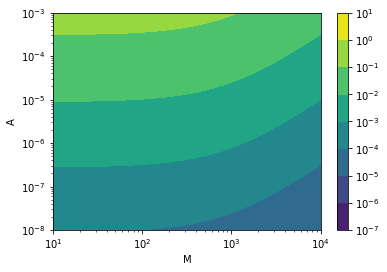

In [18]:
plt.contourf(MM,AA,aa,locator=ticker.LogLocator())
plt.xlabel('M')
plt.ylabel('A')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [59]:
Msorted = {}
for M in Mvals:
    Msorted[str(M)]={'A':list(),'aeq':list()}

for M in Mvals:
    for m in models:
        if moddata[m]['Mass']==M:
            Msorted[str(M)]['A']+=[moddata[m]['A']]
            Msorted[str(M)]['aeq']+=[moddata[m]['aeq']]

aa = []
Arep = []
Mrep = []

for M in Mvals:
    aa += Msorted[str(M)]['aeq']
    Arep += Msorted[str(M)]['A']
    for i in range(0,len(Msorted[str(M)]['A'])):
        Mrep += [M]

In [69]:
afunc = interp2d(np.log10(Arep),np.log10(Mrep),np.log10(aa))

/home/markus/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=92,58 m=5000 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


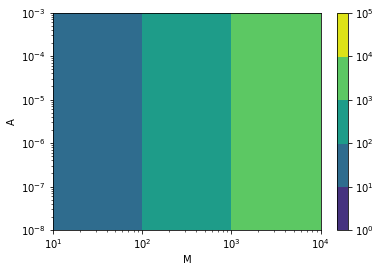

In [21]:
plt.contourf(MM,AA,MM,locator=ticker.LogLocator())
plt.xlabel('M')
plt.ylabel('A')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

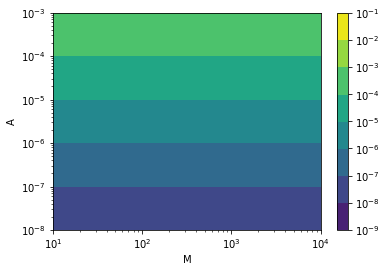

In [22]:
plt.contourf(MM,AA,AA,locator=ticker.LogLocator())
plt.xlabel('M')
plt.ylabel('A')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [29]:
aVals = np.zeros(Avals.size*Mvals.size)

In [33]:
for iA in range(0,Avals.size):
    for iM in range(0,Mvals.size):
        aVals[iA*Mvals.size+iM]=aa[iM,iA]

In [47]:
Afile= open("../resonance_DM_input/Alist.txt","w+")
for iA in range(0,Avals.size):
    Aval = Avals[iA]
    Afile.write(f'{Aval}\n')
Afile.close()

In [48]:
Mfile= open("../resonance_DM_input/Mlist.txt","w+")
for iM in range(0,Mvals.size):
    Mval = Mvals[iM]
    Mfile.write(f'{Mval}\n')
Mfile.close()

In [49]:
afile= open("../resonance_DM_input/agrid.txt","w+")
for ia in range(0,aVals.size):
    aval = aVals[ia]
    afile.write(f'{aval}\n')
afile.close()

In [54]:
logAfile= open("../resonance_DM_input/logAlist.txt","w+")
for iA in range(0,Avals.size):
    Aval = np.log10(Avals[iA])
    logAfile.write(f'{Aval}\n')
logAfile.close()

In [53]:
logMfile= open("../resonance_DM_input/logMlist.txt","w+")
for iM in range(0,Mvals.size):
    Mval = np.log10(Mvals[iM])
    logMfile.write(f'{Mval}\n')
logMfile.close()

In [55]:
logafile= open("../resonance_DM_input/logagrid.txt","w+")
for ia in range(0,aVals.size):
    aval = np.log10(aVals[ia])
    logafile.write(f'{aval}\n')
logafile.close()

In [58]:
sizefile= open("../resonance_DM_input/sizes.txt","w+")
sizefile.write(str(Mvals.size) + ' ' + str(Avals.size) + ' ' + str(aVals.size))
sizefile.close()

In [62]:
np.log10(Avals)

array([-8.        , -7.94949495, -7.8989899 , -7.84848485, -7.7979798 ,
       -7.74747475, -7.6969697 , -7.64646465, -7.5959596 , -7.54545455,
       -7.49494949, -7.44444444, -7.39393939, -7.34343434, -7.29292929,
       -7.24242424, -7.19191919, -7.14141414, -7.09090909, -7.04040404,
       -6.98989899, -6.93939394, -6.88888889, -6.83838384, -6.78787879,
       -6.73737374, -6.68686869, -6.63636364, -6.58585859, -6.53535354,
       -6.48484848, -6.43434343, -6.38383838, -6.33333333, -6.28282828,
       -6.23232323, -6.18181818, -6.13131313, -6.08080808, -6.03030303,
       -5.97979798, -5.92929293, -5.87878788, -5.82828283, -5.77777778,
       -5.72727273, -5.67676768, -5.62626263, -5.57575758, -5.52525253,
       -5.47474747, -5.42424242, -5.37373737, -5.32323232, -5.27272727,
       -5.22222222, -5.17171717, -5.12121212, -5.07070707, -5.02020202,
       -4.96969697, -4.91919192, -4.86868687, -4.81818182, -4.76767677,
       -4.71717172, -4.66666667, -4.61616162, -4.56565657, -4.51

In [70]:
10**afunc(-5,1.6)

array([0.01041097])

In [71]:
10**afunc(-6,2)

array([0.00248567])